#    Data Acquistion

In [49]:
# https://data.mendeley.com/datasets/69dcnv2gzd/1

##### Collection of over 10,087 posts from cancer patients and their caregivers on platforms like Reddit, Daily Strength, and the Health Board. The posts were related to five types of cancer: brain, colon, liver, leukemia, and lung cancer. Two team members scored each post based on the emotions expressed, using a scale from -2 to 1. Negative scores (-1 or -2) were given for posts showing grief or suffering, positive scores (1) for happy emotions like relief or accomplishment, and posts with no emotion received a score of 0 and were considered neutral. This analysis aims to understand the emotional aspects of cancer patients  posts for a mental health study

# Import Necessary Libraries

In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import regex as re
import string
from textblob import TextBlob
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, WhitespaceTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#pip install xgboost
from xgboost import XGBClassifier

In [53]:
df=pd.read_csv('Mental Health Dataset.csv')

In [54]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [55]:
df.shape

(10392, 3)

In [56]:
df.columns

Index(['posts', 'predicted', 'intensity'], dtype='object')

In [57]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [58]:
df=df.dropna()
df.isnull().sum()

posts        0
predicted    0
intensity    0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


In [60]:
df.nunique()

posts        10391
predicted        4
intensity        4
dtype: int64

In [61]:
df['predicted'].value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

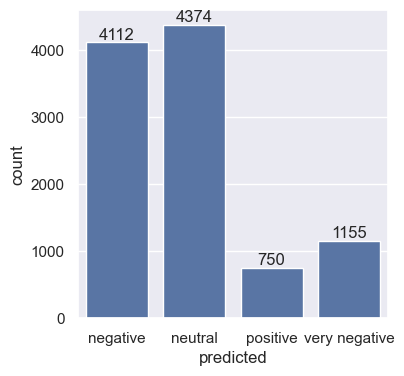

In [62]:
plt.figure(figsize=(4,4),dpi=100)
a=sns.countplot(data=df,x='predicted')

for i in a.containers:
    a.bar_label(i)
plt.show()

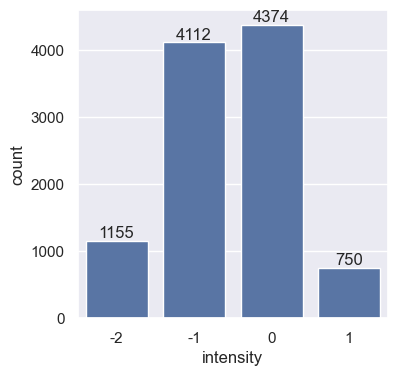

In [63]:
plt.figure(figsize=(4,4),dpi=100)
a=sns.countplot(data=df,x='intensity')

for i in a.containers:
    a.bar_label(i)
plt.show()

# Text Preparation

In [65]:
review_0 = df['posts'].values[0]
print(review_0)

print("****************"*5)

review_100 = df['posts'].values[100]
print(review_100)

print("****************"*5)

review_5500 = df['posts'].values[5500]
print(review_5500)

print("****************"*5)

review_10000 = df['posts'].values[10000]
print(review_10000)

I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

### Convert the text to Lower case

In [67]:
df['posts']=df['posts'].str.lower()

In [68]:
review_0 = df['posts'].values[0]
print(review_0)

print("****************"*5)

review_100 = df['posts'].values[100]
print(review_100)

print("****************"*5)

review_5500 = df['posts'].values[5500]
print(review_5500)

print("****************"*5)

review_10000 = df['posts'].values[10000]
print(review_10000)

i know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but i quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then i have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and i tell my boss that he was sick and not to be surpise if i call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

### Remove punctuation

In [70]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [71]:
def remove_punctuation(text):
    punctuation_free="".join([i for i in text if i not in string.punctuation])
    return punctuation_free

In [72]:
#Using the function on a single post
remove_punctuation(df['posts'][0])

'i know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but i quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then i have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and i tell my boss that he was sick and not to be surpise if i call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by t

In [73]:
df['posts'] = df['posts'].apply(lambda x:remove_punctuation(x))

In [74]:
df['posts']

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

### Remove Stopwords

In [76]:
stopwords=set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [77]:
def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [78]:
df['posts'] = df['posts'].apply(lambda x:remove_stopwords(x))

In [79]:
df['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

### Lemmatization

In [81]:
lemm=WordNetLemmatizer()

In [82]:
def lemmatizer(text):
    lemm_text=" ".join([lemm.lemmatize(word) for word in text.split()])
    return lemm_text

In [83]:
df['posts'] = df['posts'].apply(lambda x:lemmatizer(x))

In [84]:
df['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

### Remove digits

In [86]:
def remove_digits(text):
    non_digit_text=re.sub('[^a-z]+',' ',text)
    return non_digit_text

In [87]:
df['posts'] = df['posts'].apply(lambda x:remove_digits(x))

In [88]:
df['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390     year old father much past year really need tr...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [89]:
df

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral,0
...,...,...,...
10387,hey everyone year old male work eat pretty hea...,negative,-1
10388,surgery stage colon cancer year ago cea level ...,very negative,-2
10389,doctor advise could remove abnormal polyp chri...,neutral,0
10390,year old father much past year really need tr...,neutral,0


# Feature Engineering - Convert Text to Vector and Model Creation

### Label Encoding & Train-Test split

In [92]:
df1 = df[['predicted','posts']]
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


In [93]:
y=df1['predicted']
x=df1['posts']

In [94]:
from sklearn.preprocessing  import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)
y

array([0, 1, 0, ..., 1, 1, 0])

In [95]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

### Using TFIDF technique with SupportVectorClassifier and XGBoostClassifier using ML Pipeline

In [97]:
tfidf=TfidfVectorizer()

### Support Vector Classifier

In [99]:
from sklearn.svm import SVC
clf1=SVC()

In [100]:
classification_model=Pipeline([('Vectorization',tfidf),('Model',clf1)])

In [101]:
classification_model.fit(x_train,y_train)

Pipeline(steps=[('Vectorization', TfidfVectorizer()), ('Model', SVC())])

### Support Vector Classifier Prediction

In [103]:
y_pred_train=classification_model.predict(x_train)
y_pred_train

array([1, 0, 2, ..., 1, 0, 1])

In [104]:
y_pred_test=classification_model.predict(x_test)
y_pred_test

array([0, 3, 3, ..., 1, 0, 1])

In [105]:
confusion_matrix(y_train,y_pred_train)

array([[3250,   30,    0,    9],
       [  84, 3405,    5,    5],
       [  47,   46,  501,    6],
       [  48,    4,    0,  872]], dtype=int64)

In [106]:
confusion_matrix(y_test,y_pred_test)

array([[654, 139,   4,  26],
       [133, 732,   4,   6],
       [ 61,  55,  23,  11],
       [100,   4,   3, 124]], dtype=int64)

In [107]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       823
           1       0.79      0.84      0.81       875
           2       0.68      0.15      0.25       150
           3       0.74      0.54      0.62       231

    accuracy                           0.74      2079
   macro avg       0.72      0.58      0.61      2079
weighted avg       0.74      0.74      0.72      2079



In [108]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*************"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.965832531280077
**********************************************************************************************************************************
Test Accuracy : 0.7373737373737373


### XGBoost Classifier

In [110]:
clf2 = XGBClassifier()

In [111]:
classification_model=Pipeline([('Vectorization',tfidf),('Model',clf2)])

In [112]:
classification_model.fit(x_train,y_train)

Pipeline(steps=[('Vectorization', TfidfVectorizer()),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

### XGBoost Prediction

In [114]:
y_pred_train=classification_model.predict(x_train)
y_pred_train

array([1, 0, 2, ..., 1, 0, 1], dtype=int64)

In [115]:
y_pred_test=classification_model.predict(x_test)
y_pred_test

array([0, 0, 3, ..., 1, 0, 1], dtype=int64)

In [116]:
confusion_matrix(y_train,y_pred_train)

array([[3180,  107,    2,    0],
       [  10, 3488,    0,    1],
       [   6,   32,  562,    0],
       [   6,    2,    0,  916]], dtype=int64)

In [117]:
confusion_matrix(y_test,y_pred_test)

array([[630, 152,  10,  31],
       [152, 702,   9,  12],
       [ 58,  45,  36,  11],
       [ 92,   5,   4, 130]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       823
           1       0.78      0.80      0.79       875
           2       0.61      0.24      0.34       150
           3       0.71      0.56      0.63       231

    accuracy                           0.72      2079
   macro avg       0.69      0.59      0.62      2079
weighted avg       0.72      0.72      0.71      2079



In [119]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*************"*10)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9800288739172281
**********************************************************************************************************************************
Test Accuracy : 0.7205387205387206
